## Final Project Submission

Please fill out:
* Student name: Yannick MPOYI
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Rose Delilah
* Blog post URL:


##### A. Project summary

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. we are charged with exploring what types of films are currently doing the best at the box office. we must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

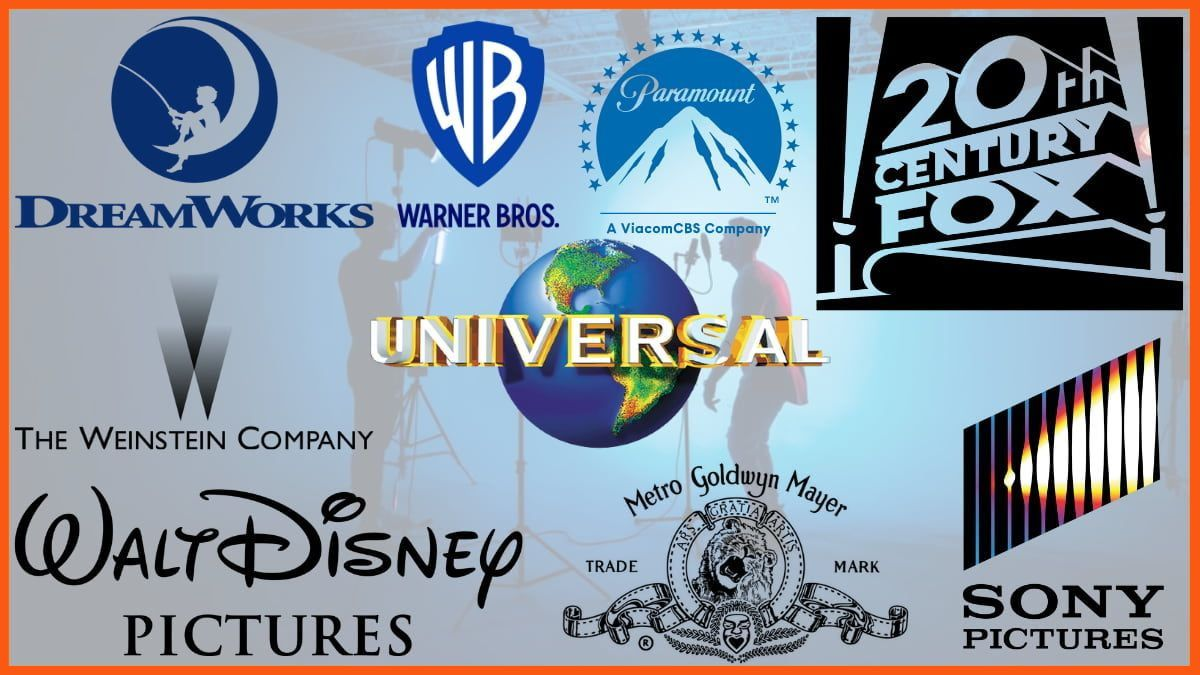

#### B. Business Analysis Orientation

In order to  provide insights and enforce the company penetration market strategies in the movie industry, our results will focus on the following strategic orientations:
    
    o Top 10  competitors in the market (Top highest movie studios)
    o The most profitable movie market(Domestic or foreign) 
    o The movie segmentation per movie genres.
    o The movie genre that the company should target the most.
    o The gross income view on the movie average ratings.
    O The average number of movies produced in a year

##### C. Data collection sources

The data sources used for this project are from the Box Office Mojo and the Internet Movie Database (IMDb) which is an online database containing information and statistics about movies, TV shows and video games as well as actors, directors and other film industry professionals. 
Actually, we used three recommended databases:

  o Two datasets (imdb.title.ratings and imdb.title.basics) exctracted  from the Internet Movie Database (IMDb) that respectively provides information on the movie ratings, votes for the titles, movie genres,etc. . There are available online and refreshed daily on https://www.imdb.com/interfaces/
 
  o One dataset (bom.movie_gross) that provides information on the generated by the Box Office Mojo.

##### D. Methodology

    o We will go through this wonderful journey by the usage of the exploratory data analysis

##### - Important points:
(1) We were able to clone the forked repository from  https://github.com/learn-co-curriculum/dsc-phase-1-project using Git bash.

(2) From Git bash, we were able to use 'gunzip' command in order to unzip all the datasets zipfiles in the zippedData folder. 

### 0. Importing modules and loading the datasets

In [920]:
# Importing useful modules for :
    # Data wrangling and manipulation 
    # Numerical operation and arrays
    # Data visualization and othres
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [573]:
# Loading datasets (Recommanded: bom_movie_gros,title_basics,title_ratings)
bom_movie_gross = pd.read_csv("/Users/ADMN/Desktop/Moringa/Phase 1/dsc-phase-1-project/Zipdata/bom.movie_gross.csv")
title_basics = pd.read_csv("/Users/ADMN/Desktop/Moringa/Phase 1/dsc-phase-1-project/Zipdata/title.basics.csv")
title_ratings = pd.read_csv("/Users/ADMN/Desktop/Moringa/Phase 1/dsc-phase-1-project/Zipdata/title.ratings.csv")

### I. Data understanding and  cleaning

#### 1. 'bom_movie_gros' dataset

In [556]:
# Checking dataset
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [335]:
# Dataset summary
bom_movie_gross.info()
bom_movie_gross.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


(3387, 5)

    ------------------------------------------------------------------------------------------------------------
    (1)dataset has 3387 raws and 5 columns in the dataset
    (2)foreign_gross is an object instead of integer
    (3)We are able to tell that there are missing values in columns(studio,domestic_gross, foreign_gross)
    ------------------------------------------------------------------------------------------------------------

#### Transforming the 'foreign_gross' column from oject to integer

In [574]:
#you drop the comma first using replace
bom_movie_gross['foreign_gross']=bom_movie_gross['foreign_gross'].str.replace(',','')

In [575]:
#Transforming the 'foreign_gross' column from oject to integer
bom_movie_gross['foreign_gross']=bom_movie_gross['foreign_gross'].astype(float)

In [559]:
# Rechecking the dataset summary
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


From the above result, we can easily tell that "foreign_gross" column is now a float64

##### Checking missing values and duplicates 

In [560]:
# View of the dataset
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [561]:
# Checking missing values
bom_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

From this result we can conclude that the missing values are in the following columns: 'foreign_gross', 'domestic_gross'
and 'domestic_gross'  for respective counts : 1350, 28 and 5

<AxesSubplot:>

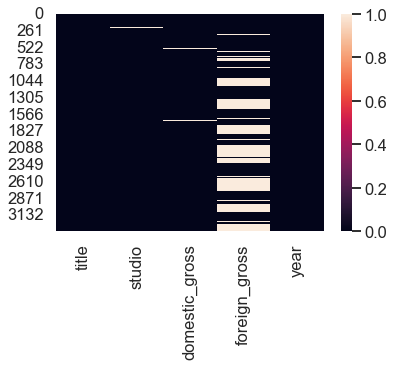

In [562]:
# Visualizing missing values
sns.heatmap(bom_movie_gross.isnull())

From the above color-encoded matrix, we can clearly view the affected columns by white bars(representing the missing values)

In [576]:
#Another way to Identify the missing values
def values_miss(data):
    
    # Identify the total missing values per column and sort in order 

    bom_miss = bom_movie_gross.isnull().sum().sort_values(ascending = False)

    # The percentage of the missing values
    percentage_miss = (bom_movie_gross.isnull().sum() / len(bom_movie_gross)).sort_values(ascending = False)

    # Load the missing data in a dataframe 
    df_bom_missing = pd.DataFrame({"Missing Data": bom_miss, "Percentage(%)": percentage_miss})

    # Let's remove values that are missing 
    df_bom_missing.drop(df_bom_missing[df_bom_missing["Percentage(%)"] == 0].index, inplace = True)

    return df_bom_missing

Bom1_missing_values = values_miss(bom_movie_gross)
Bom1_missing_values

,Missing Data,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


In [592]:
#Replace missing 'foreign_gros' values with median
bom_movie_gross['foreign_gross'].fillna(bom_movie_gross['foreign_gross'].median(), inplace=True)

#Replace missing 'foreign_gros' values with median
bom_movie_gross['domestic_gross'].fillna(bom_movie_gross['domestic_gross'].median(), inplace=True)


#Replace missing values for the remaining column 'studio' by the mode
bom_movie_gross=bom_movie_gross.fillna(bom_movie_gross.mode().iloc[0])

In [541]:
# Recheking the dataset summary
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [542]:
# Statistical summary for the numerical columns
bom_movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.387000e+03,3.387000e+03,3387.000000
mean,2.851978e+07,5.248329e+07,2013.958075
std,6.675093e+07,1.100461e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.225000e+05,1.160000e+07,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.750000e+07,2.915000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


#### Checking for duplicates

         o The dataset has no duplicate records






###### For the sake of business finalities, We would like to create a column for worldwide box office (Gross)

In [594]:
#Calculating the new column 'worldwide_gross'
bom_movie_gross['worldwide_gross'] = bom_movie_gross['foreign_gross']+bom_movie_gross['domestic_gross']

In [595]:
#View of the table with the new column 'worldwide_gross'
bom_movie_gross.head(3)

,primary_title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08


#### 2. 'title_basics' dataset

In [262]:
# Checking dataset
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [280]:
# Dataset summary
title_basics.info()
title_basics.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


(146144, 6)

    ------------------------------------------------------------------------------------------------------------
    (1) The dataset has 146144 raws and 6 columns in the dataset
    (2) We are able to tell that there are missing values in 3 columns (original_title, runtime_minutes and genres)
    ------------------------------------------------------------------------------------------------------------

In [165]:
# Checking missing values
title_basics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

From this result we can conclude that the missing values are in the following columns: 'job' and'634826'
and 'domestic_gross' for respective counts : 850502 and 634826

<AxesSubplot:>

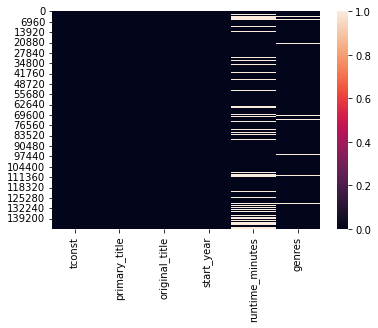

In [94]:
# Visualizing missing values
sns.heatmap(title_basics.isnull())

o From the above color-encoded matrix, we can clearly view the affected columns by white bars(representing the missing values).

o Note: the 'runtime_minutes' column is more affected by missing values than the 'characters' column.

In [47]:
#Another way to Identify the missing values
def values_miss(data):
    
    # Identify the total missing values per column and sort in order 

    basic_miss = title_basics.isnull().sum().sort_values(ascending = False)

    # The percentage of the missing values
    percentage_miss1 = ((title_basics.isnull().sum() / len(title_basics)).sort_values(ascending = False))*100

    # Load the missing data in a dataframe 
    df_basic_missing = pd.DataFrame({"Missing Data2": basic_miss, "Percentage(%)": percentage_miss1})

    # Let's remove values that are missing 
    df_basic_missing.drop(df_basic_missing[df_basic_missing["Percentage(%)"] == 0].index, inplace = True)

    return df_basic_missing

basic_missing_values = values_miss(title_basics)
basic_missing_values

,Missing Data2,Percentage(%)
runtime_minutes,31739,21.717621
genres,5408,3.700460
original_title,21,0.014369


o 21.72% of Movies are missing the 'runtime_minutes'

o 3.70% of Movies are missing the 'genres'

o 0.014% of Movies are missing the 'original_title'

In [582]:
#Replace missing 'runtime_minutes' values with median
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].median(), inplace=True)

#Replace missing 'original_title' values (using the primary title/tconst)
title_basics['original_title'] = title_basics['original_title'].fillna(title_basics['primary_title'])


In [583]:
#Replace missing values for the remaining column 'genres' by the mode
title_basics=title_basics.fillna(title_basics.mode().iloc[0])

# Recheking the dataset summary
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [584]:
# Statistical summary for the numerical column
title_basics.describe() 

,start_year,runtime_minutes
count,146144.000000,146144.000000
mean,2014.621798,86.363758
std,2.733583,147.191650
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,87.000000
75%,2017.000000,95.000000
max,2115.000000,51420.000000


The runtime_minutes distribution has larger median then the mean. This is a characteric of a  classic negative skewed distribution

#### Checking for duplicates

In [175]:
# Checking for duplicates
title_basics.duplicated().value_counts()

False    146144
dtype: int64

     o The dataset has no duplicate records

#### 3. 'title_ratings' dataset

In [176]:
# Brief view of  the dataset
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [585]:
# Dataset summary
title_ratings.info()
title_ratings.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


(73856, 3)

    ------------------------------------------------------------------------------------------------------------
    (1) The dataset has 73856 raws and 3 columns in the dataset
    (2) There are one object('tconst'), one float64('averagerating') and integer ('numvotes')
    (3) We are able to tell that there are no missing values in the dataset columns
    ------------------------------------------------------------------------------------------------------------

#### Checking missing values and  duplicates

In [586]:
# View of the dataset
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [587]:
# Checking missing values
title_ratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

    o There are no missing values in the dataset

In [919]:
# Statistical summary for the numerical columns
title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The above table displays the two negative and classic skewed distributions where the medians are larger than the means

##### Checking for duplicates

In [6]:
# Checking for duplicates
title_ratings.duplicated().value_counts()

False    73856
dtype: int64

     o The dataset has no duplicate records

### Here is the summary of our three datasets :

        o The 'bom_movie_gross' dataset has a lenght of (3387, 5)
        o The 'title_basics' dataset has a lenght of (146144, 6)
        o The ''title_ratings'' dataset has a lenght of (73856, 3)




### II. Merging datasets

##### Point: 
Combining the two datasets will yield a single dataset for the sake of the business data analysis. All unmatched outcome will be excluded in order to ensure that there won't be any missing value. The mismatched data are also to be excuded.

In [596]:
#merge imdb_title_df and imdb_ratings using an inner join
Merged_title =title_basics.merge(title_ratings, on='tconst', how='inner')
Merged_title.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [597]:
Merged_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


##### Merging with the the Merged_title with 'bom_movie_gross' dataset


##### Important note:
                     o We will use the "title"(from 'bom_movie_gross') column  and 'original_title'(from 'Merged_title') 
                     column as our common key. Therefore, it is important to have the same column name in both datasets

In [598]:
#Let's rename the "title" column name from the 'bom_movie_gros' dataset
bom_movie_gross.rename({'title': 'primary_title'}, axis=1, inplace=True)

In [599]:
#Checking the modified colum before merging
bom_movie_gross.head(2)

,primary_title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09


In [600]:
# Dataset summary
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    3387 non-null   object 
 1   studio           3387 non-null   object 
 2   domestic_gross   3387 non-null   float64
 3   foreign_gross    3387 non-null   float64
 4   year             3387 non-null   int64  
 5   worldwide_gross  3387 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


In [601]:
# Merging datasets
StudioM_df=Merged_title.merge(bom_movie_gross, on='primary_title', how='inner')

### The new dataset ('StudioM_df')manipulation and review

In [602]:
# New dataset summary
StudioM_df.info()
StudioM_df.shape
StudioM_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  3027 non-null   float64
 5   genres           3027 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3027 non-null   object 
 9   domestic_gross   3027 non-null   float64
 10  foreign_gross    3027 non-null   float64
 11  year             3027 non-null   int64  
 12  worldwide_gross  3027 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 331.1+ KB


,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,worldwide_gross
count,3027.000000,3027.000000,3027.000000,3.027000e+03,3.027000e+03,3.027000e+03,3027.000000,3.027000e+03
mean,2013.783284,106.903204,6.457582,6.170030e+04,3.042782e+07,5.474669e+07,2014.077635,8.517451e+07
std,2.466955,20.073663,1.012277,1.255132e+05,6.651972e+07,1.116785e+08,2.442245,1.698361e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000,1.080000e+04
25%,2012.000000,93.000000,5.900000,2.117000e+03,1.445000e+05,1.290000e+07,2012.000000,1.871170e+07
50%,2014.000000,104.000000,6.600000,1.310900e+04,1.900000e+06,1.870000e+07,2014.000000,1.970000e+07
75%,2016.000000,118.000000,7.100000,6.276550e+04,3.210000e+07,3.450000e+07,2016.000000,7.110000e+07
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000,1.405400e+09


In [603]:
# New dataset view
StudioM_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,18700000.0,2016,19800000.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012,8744000.0
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012,8744000.0
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012,8744000.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013,188100000.0


#### Column data understanding

In [604]:
# 'genres' column reveiw
StudioM_df['genres'].value_counts()      

Drama                       317
Comedy,Drama                133
Comedy,Drama,Romance        132
Documentary                 117
Drama,Romance               112
                           ... 
Action,Comedy,Sport           1
Comedy,Mystery,Thriller       1
Adventure,History             1
Adventure,Comedy,Western      1
Documentary,Sport             1
Name: genres, Length: 322, dtype: int64

###### After a close review of this 'genre' column, we can conclude that :
                                            there are some redundancies in the column modalities and  this will not 
                                            help in responding accordingly to the stakeholders' concern.
                                            Therefore, we will reduce those modalities
                                            (by  only maintaining the movie genre that comes before the comma).

In [605]:
# 'year' column reveiw
StudioM_df['year'].value_counts() 

2015    414
2016    405
2011    357
2012    355
2014    350
2017    318
2013    314
2018    276
2010    238
Name: year, dtype: int64

In [606]:
# 'averagerating' column reveiw
StudioM_df['averagerating'].value_counts() 

6.8    143
6.4    142
6.6    141
6.3    140
7.2    136
      ... 
8.9      1
2.1      1
3.1      1
9.1      1
1.9      1
Name: averagerating, Length: 71, dtype: int64

In [607]:
# Let's create the new column "genre1" based on the 'genre' colum (the first data raw before the comma)
StudioM_df["genre1"] = StudioM_df['genres'].str.extract(r'^([^,]*)',expand=True)
#We've decided to keep the initial 'genre' column in case of further need.

In [608]:
# View of the new column (genre1)
StudioM_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,worldwide_gross,genre1
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,18700000.0,2016,19800000.0,Action
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012,8744000.0,Adventure
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012,8744000.0,Drama


In [609]:
# 'genres' column reveiw
StudioM_df['genre1'].value_counts()  

Drama          777
Action         646
Comedy         617
Biography      251
Adventure      214
Documentary    167
Crime          140
Horror         111
Animation       36
Thriller        27
Fantasy         13
Mystery         10
Romance          9
Family           5
Sci-Fi           2
Sport            1
Music            1
Name: genre1, dtype: int64

### Quick Outliers detection with the boxplot

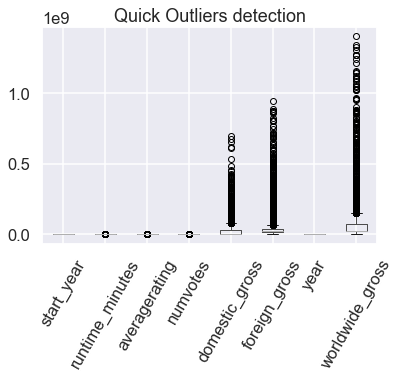

In [610]:
# Quick view on the outliers
StudioM_df.boxplot()
plt.title('Quick Outliers detection')
plt.xticks(rotation=60);

o From the above visualization, we can conclude that the domestic, forein and worldwide gross income have outliers.
  We've decided to keep them for now
    

### III. Visualizating data

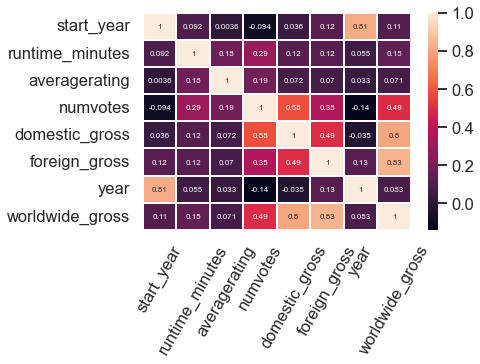

In [611]:
# Correlation view
corr_StudioM_df = StudioM_df.corr(method='spearman')

# Customize the heatmap of the correlation matrix
sns.heatmap(corr_StudioM_df,
           annot=True,
           linewidths=0.4,
           annot_kws={'size': 8});

plt.xticks(rotation=60);
plt.yticks(rotation=0);

    o There is no strong nor meaningful correlation among columns. 
    o It is natural to find out that the worldwide is correlated with both domestic and foreign gross income. 
        It has been calculated by both gross income.

### Number of votes, movies running times and average ratings

##### 1.Number of votes('numvotes')

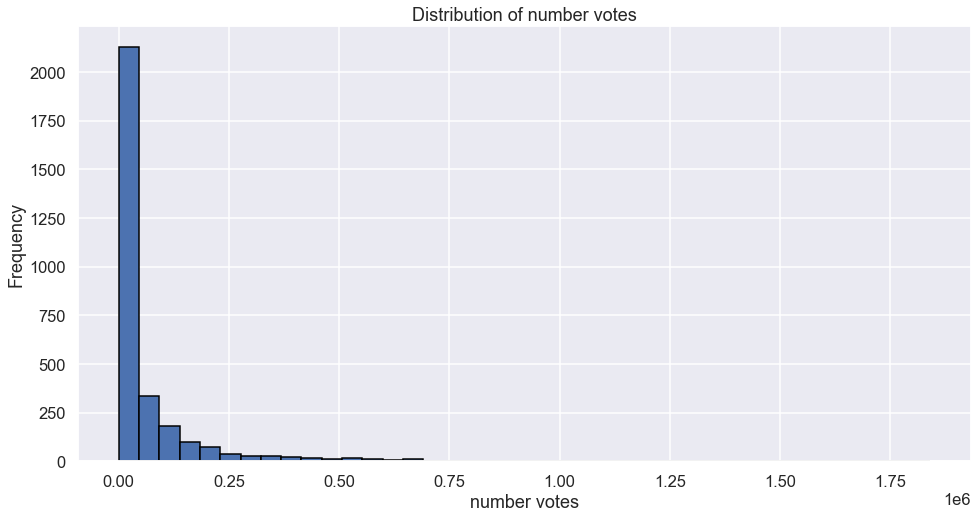

In [936]:
# graphical representation
fig, ax = plt.subplots(figsize=(16,8))

#plotting
StudioM_df['numvotes'].hist(edgecolor = "black", bins=40, ax=ax)

#Lavels
ax.set_title('Distribution of number votes')
ax.set_ylabel('Frequency')
ax.set_xlabel('number votes');

##### 2.Runtime_minutes('runtime_minutes')

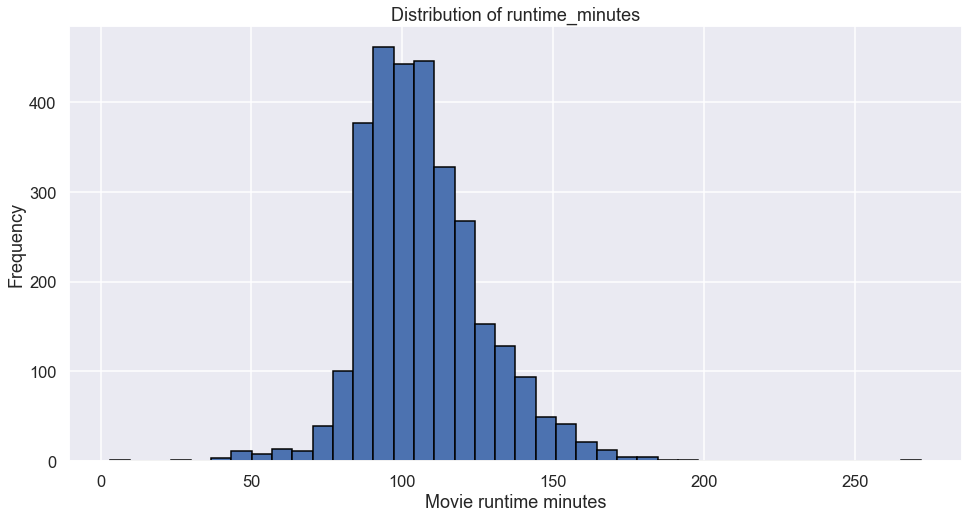

In [937]:
## graphical representation
fig, ax = plt.subplots(figsize=(16,8))

#Plotting
StudioM_df['runtime_minutes'].hist(edgecolor = "black", bins=40, ax=ax)

#Labels
ax.set_title('Distribution of runtime_minutes')
ax.set_ylabel('Frequency')
ax.set_xlabel('Movie runtime minutes');

##### 3. Average rating('averagerating')

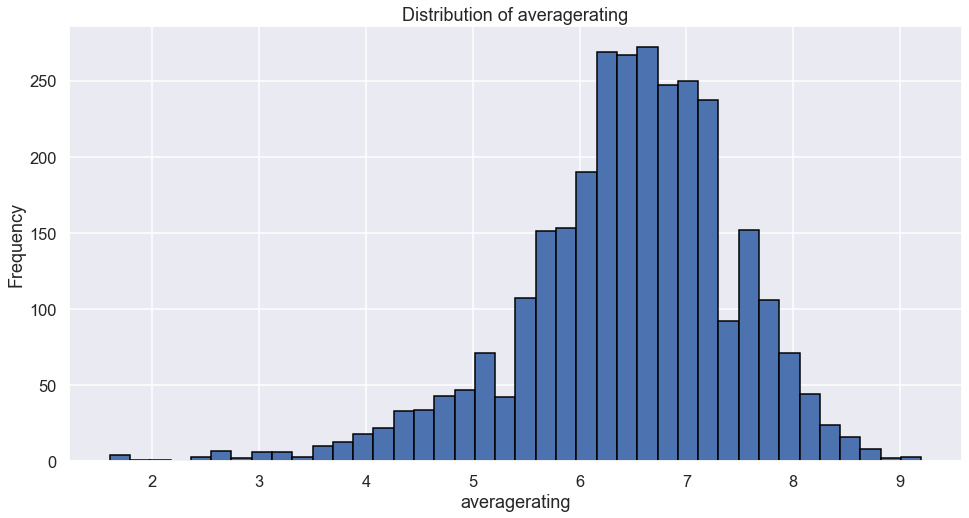

In [938]:
# graphical representation
fig, ax = plt.subplots(figsize=(16,8))

#Plotting
StudioM_df['averagerating'].hist(edgecolor = "black", bins=40, ax=ax)

#Labels
ax.set_title('Distribution of averagerating')
ax.set_ylabel('Frequency')
ax.set_xlabel('averagerating');


##### Note :
            o From the three visualizations above, we are able to assume that they seem to be normal distributions.

#### Checking th normality with different methods

##### 1.A. Number of votes('numvotes')

In [742]:
# Testing the normality with Shapiro-Wilk Test
shapiro_test_numvotes = stats.shapiro(StudioM_df['numvotes'])
shapiro_test_numvotes

ShapiroResult(statistic=0.5189515352249146, pvalue=0.0)

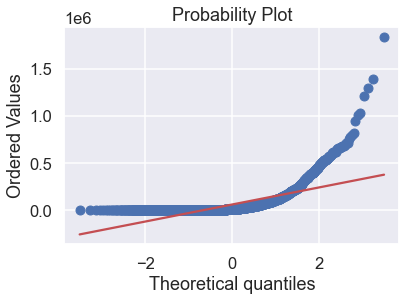

In [743]:
#Visualizing to the normality with the the probability plot
stats.probplot(StudioM_df['numvotes'], plot=plt);

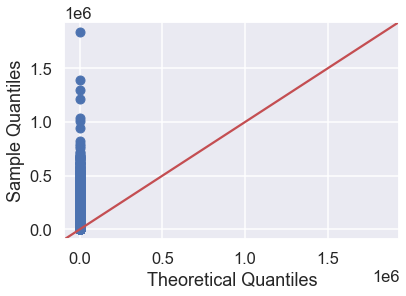

In [744]:
# Let's import modules for  QQ plot
import pylab as py
import statsmodels.api as sm

# plotting
sm.qqplot(StudioM_df['numvotes'], line ='45')
py.show()

##### 2.A. Runtime minutes('runtime_minutes')

In [745]:
# Testing the normality with Shapiro-Wilk Test
shapiro_test_minutes = stats.shapiro(StudioM_df['runtime_minutes'])
shapiro_test_minutes

ShapiroResult(statistic=0.9617912769317627, pvalue=1.4735427708497765e-27)

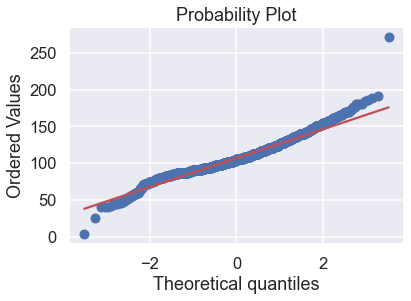

In [940]:
#Visualizing to the normality with the the probability plot
stats.probplot(StudioM_df['runtime_minutes'], plot=plt);

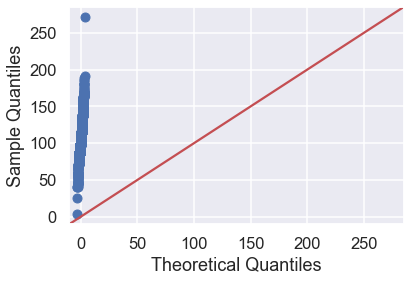

In [747]:
# plotting the QQ plot
sm.qqplot(StudioM_df['runtime_minutes'], line ='45')
py.show()

##### 3.A. Average rating('averagerating')

In [748]:
# Testing the normality with Shapiro-Wilk Test
shapiro_test_averagerating = stats.shapiro(StudioM_df['averagerating'])
shapiro_test_averagerating

ShapiroResult(statistic=0.9641689658164978, pvalue=8.86989963301057e-27)

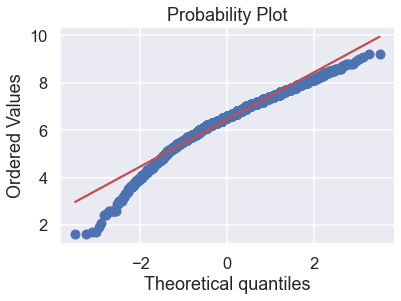

In [749]:
#Visualizing to the normality with the the probability plot
stats.probplot(StudioM_df['averagerating'], plot=plt);

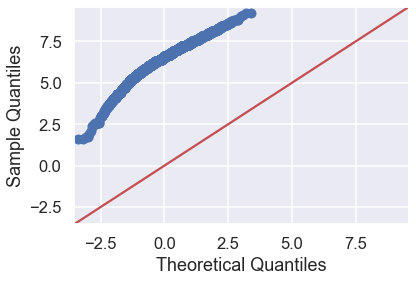

In [750]:
# plotting the QQ plot
sm.qqplot(StudioM_df['averagerating'], line ='45')
py.show()

### Comment

we performed the shapiro test, P-polt and QQ-plot in order to confirm whether or not the univariate data (columns: 'numvotes' , 'numvotes' and 'averagerating') are  normally distributed.

   o We were able to check all departures from normality with the Shapiro-Wilks test. 
            Therefore, we have to reject the hypothesis of normality when the p-value is less than or equal to 0.05.
            Which was the case with 'numvotes' , 'numvotes' and 'averagerating'.
            
   o Points on the Normal QQ plot provide an indication of normality of the 'numvotes', 'numvotes' and 'averagerating' columns. 
            The data points have to fall on the 45-degree reference line if the the distribution is normally distributed. 
            Otherwise, the distribution is not normally distributed. Which means that there's a deviation of the data points 
            from the reference line. The points deviation from the reference line was also the case in the Probability plot.

##### 4. The box office per movie genre ('worldwide_gross', 'foreign_gross', 'domestic_gross)

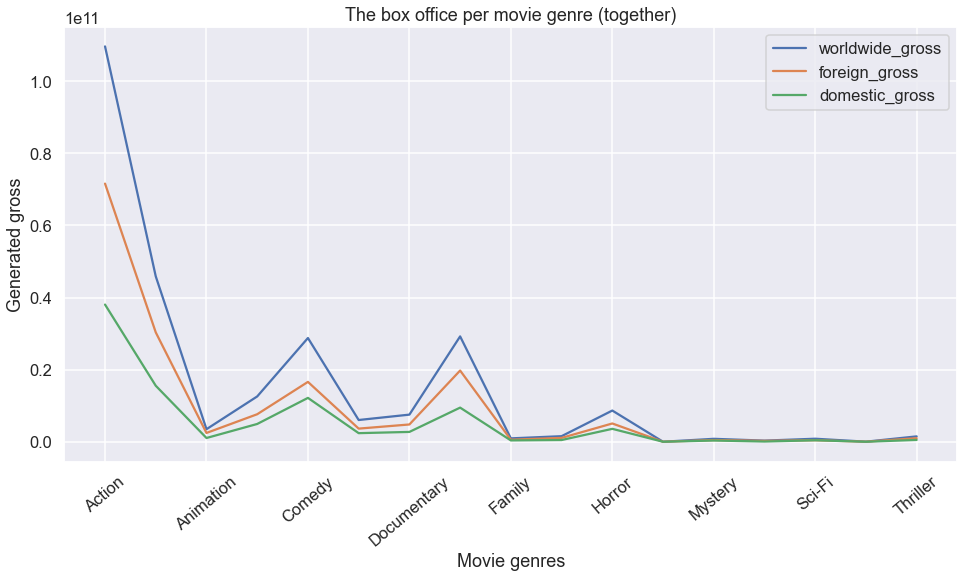

In [898]:
# graphical representation
fig, ax = plt.subplots(figsize=(16,8))

# Plotting
StudioM_df.groupby('genre1')[['worldwide_gross', 'foreign_gross', 'domestic_gross']].sum().plot(kind = 'line', ax=ax)

#Labels
ax.set_title('The box office per movie genre (together)')
ax.set_xlabel('Movie genres')
ax.set_ylabel('Generated gross')

#rotation
plt.xticks(rotation=40);

From the vizualisation above, we can conclude that the Action movies,comedy
and documentary are respectively the most profitable in the national market as well as in the international one. Action movies are extremely the most successful in all markets.

It is important to mention that the foreign market is more profitable than the domestic one in any movie category.

##### 5. The box office('worldwide_gross', 'foreign_gross', 'domestic_gross) throughout the year.

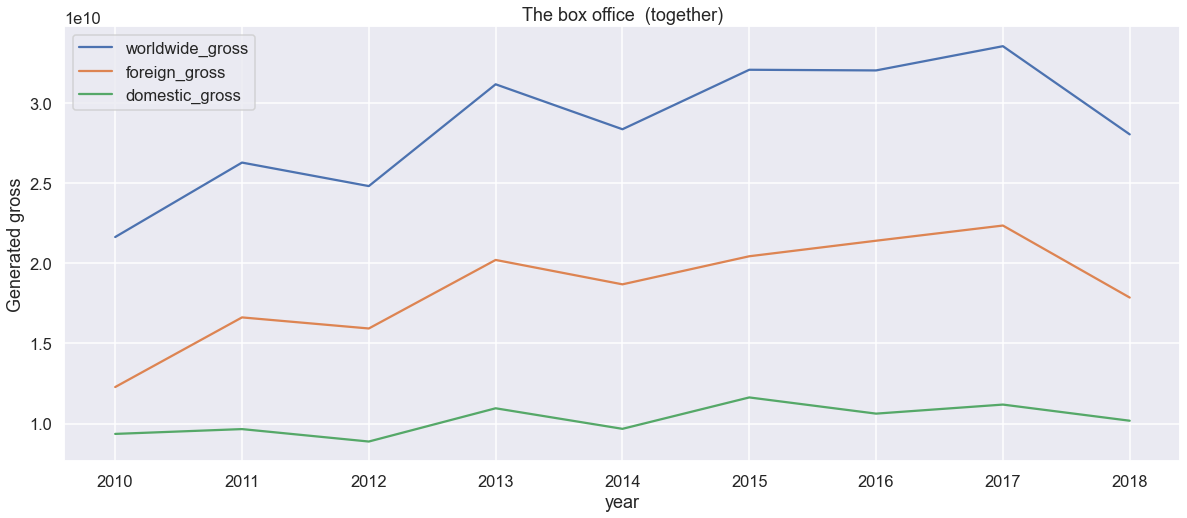

In [901]:
# graphical representation
fig, ax = plt.subplots(figsize=(20,8))

#Plotting
StudioM_df.groupby('year')[['worldwide_gross', 'foreign_gross', 'domestic_gross']].sum().plot(kind = 'line', ax=ax)

#Labels
ax.set_title('The box office throughout the year.')
ax.set_ylabel('Generated gross income')
#Rotation
plt.xticks(rotation=0);

We can clearly observe the positive evolution, from 2010 to 2017 of the gross incomes for both national and international markets. And the foreign box office is widely higher than the domestic gross income every year. 

The year 2018 is qualified as a decline poit that started by the begining of 2017. Otherwise, the movie studios has seen the gross incomes decline in all markets from 2017 to 2018.

Comparing to the domestic gross income, the decline was more drastic for the foreign gross income. As long as the worldwide gross is the total amount of both domestic and foreign gross income, It is natural to notice that it has  the highest counts throughout the years. 

##### 6. Top 10 highest competitors in the market 

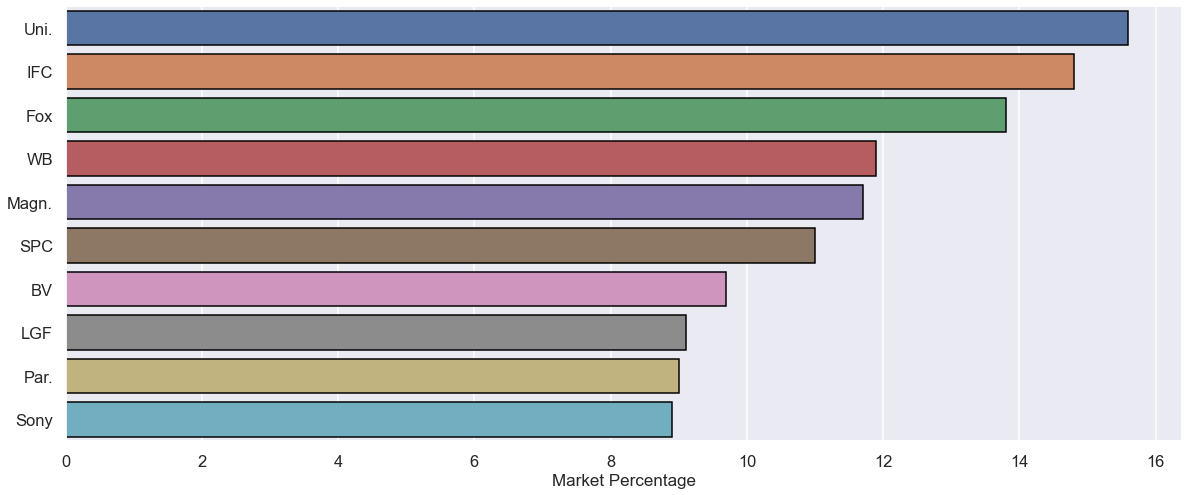

In [899]:
# Calculating the top 10 studios
studio_counts = StudioM_df["studio"].value_counts()
top_studio_counts = studio_counts.iloc[:10]

#Calculating the top 10 studios in percentage
top_percent=(top_studio_counts/len(top_studio_counts))

fig, ax = plt.subplots(figsize=(20,8))
bar_chart_title = "Top 10 highest competitors in the market "

# plotting 
sns.barplot(x=top_percent, y=top_studio_counts.index, edgecolor = "black")
# labeling the axes 
plt.xlabel("Market Percentage", fontsize = 17)
plt.title(bar_chart_title, fontsize = 20)
plt.show()


This visualization perfectly responds to our business concern. In fact, it displays the market share with top 10 highest movie studios (competitors) from Universal to Sony.
The market battle is extremely tight even though Universal, IFC and Fox are leading with a scores more than 12,8% of the share.

##### 7. The world wide box office per movie genres

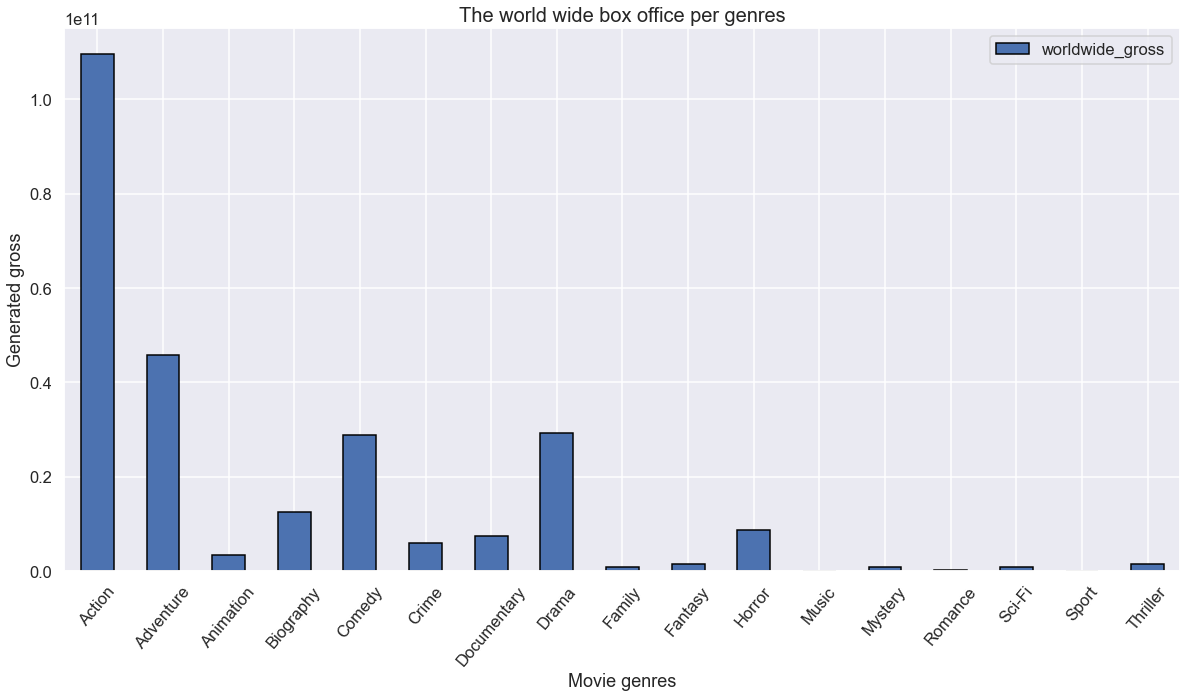

In [923]:
# graphical representation
fig, ax = plt.subplots(figsize=(20,10))

#Plotting
StudioM_df.groupby('genre1')[['worldwide_gross']].sum().plot(kind = 'bar', ax=ax, edgecolor = "black")

#Labels
ax.set_title('The world wide box office per genres',fontsize = 20)
ax.set_xlabel('Movie genres')
ax.set_ylabel('Generated gross')

#Rotation
plt.xticks(rotation=50);

As mentioned earlier, the action movie genre is an extreme profitable product. It has generated the highest gross income for the total (domestic and foreign) or worldwide market. 
The following profitable movie genres are respectively Adventure, Drama and comedy. 

##### 8. Gross income by the movie average ratings

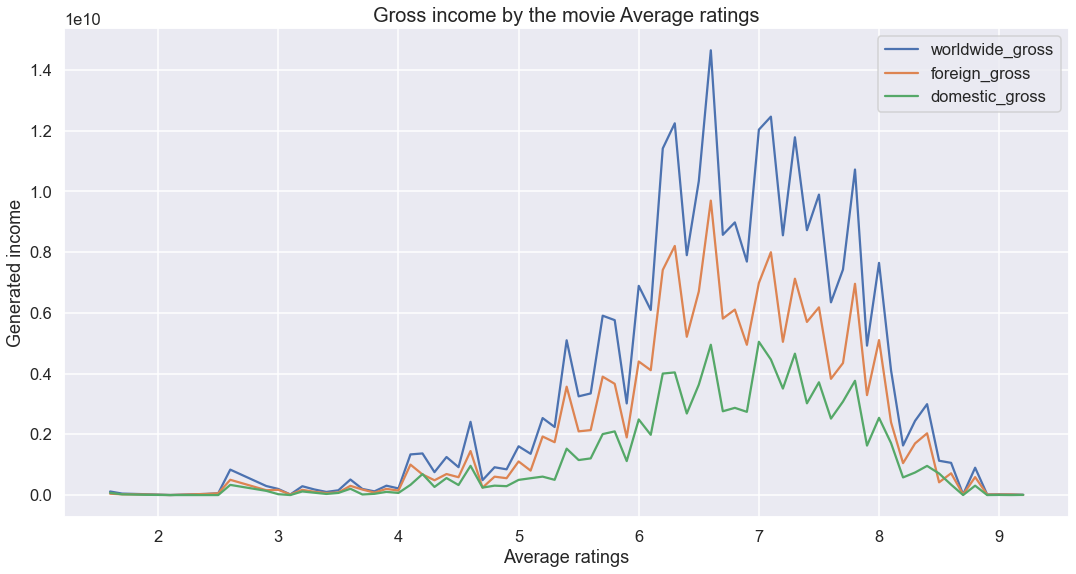

In [905]:
# graphical representation
fig, ax = plt.subplots(figsize=(18,9))

#Plotting
StudioM_df.groupby('averagerating')[['worldwide_gross', 'foreign_gross', 'domestic_gross']].sum().plot(kind = 'line', ax=ax)

#Labels
ax.set_title('Gross income by the movie average ratings', fontsize = 20)
ax.set_xlabel('Average ratings')
ax.set_ylabel('Generated income')

#Rotation
plt.xticks(rotation=0);

We can clearly notice the proportionality of worldwide, foreign and domestic gross income respectively based on the average ratings. Most of high gross income movies are on average ratings of 60.0, 7.0 and 8.0.
The business is quite more important outside of the country.

##### 9. Gross income (Worldwide only) by the movie average ratings

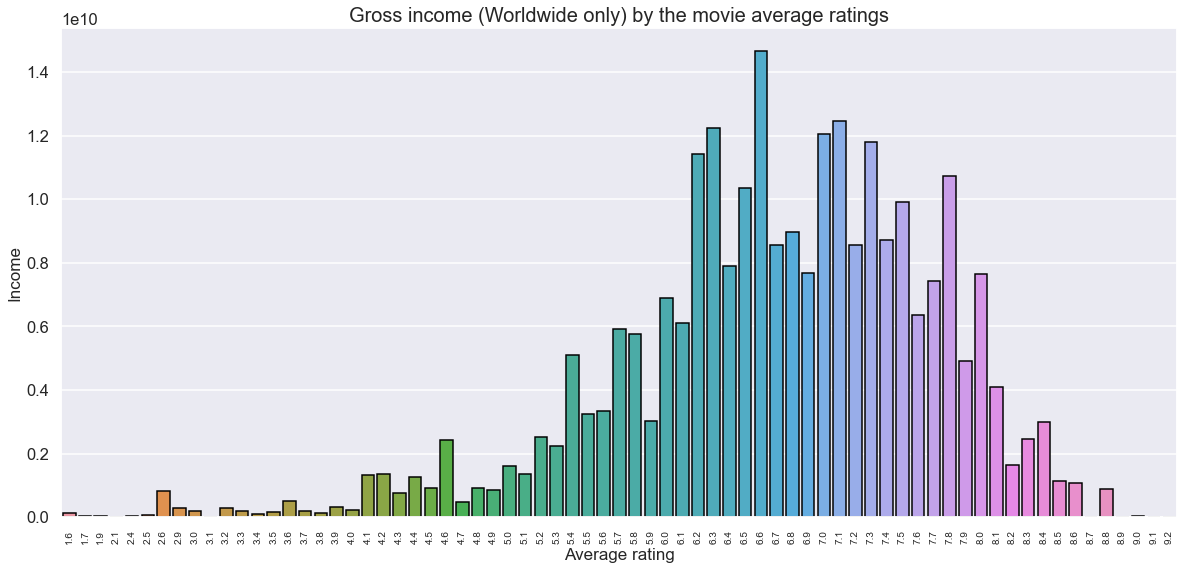

In [945]:
# Let's groupby
new_df = StudioM_df.groupby('averagerating')[['worldwide_gross']].sum()
new_df1=new_df.reset_index()

# graphical representation
fig, ax = plt.subplots(figsize=(20,9))  

# Plotting
sns.barplot(data=new_df1, x="averagerating", y="worldwide_gross", edgecolor = "black")

#Labels
plt.xlabel("Average rating", fontsize = 17)
plt.ylabel("Income", fontsize = 17)
plt.title("Gross income (Worldwide only) by the movie average ratings", fontsize = 20)

# Rotation
plt.xticks(rotation=90, fontsize = 10)
plt.show(); 

At first sight, this distribution tends to be normally distributed. Besides, we can conclude that the most successful movies at the worldwide box office are generally rated on the average from 6.0 to 8.0 ratings. Range that detains more than 70% of the gross income for both foreign and domestic.
It is import to point out that the 6.6 rating represents the peak of the box office income.

In [671]:
# Testing for normality
new_df1_test = stats.shapiro(new_df1)
new_df1_test

ShapiroResult(statistic=0.5989713668823242, pvalue=4.698527327185944e-18)

There is no normality with pvalue=4.698527327185944e-18

##### 10. The movie market view by genres

In [766]:
# Calculating the percentage of the movie genre 
top_genre1_percent=(studio_genre1.value_counts()/len(studio_genre1))*100

top_genre1_percent

Drama          25.668979
Action         21.341262
Comedy         20.383218
Biography       8.292038
Adventure       7.069706
Documentary     5.517014
Crime           4.625041
Horror          3.666997
Animation       1.189296
Thriller        0.891972
Fantasy         0.429468
Mystery         0.330360
Romance         0.297324
Family          0.165180
Sci-Fi          0.066072
Sport           0.033036
Music           0.033036
Name: genre1, dtype: float64

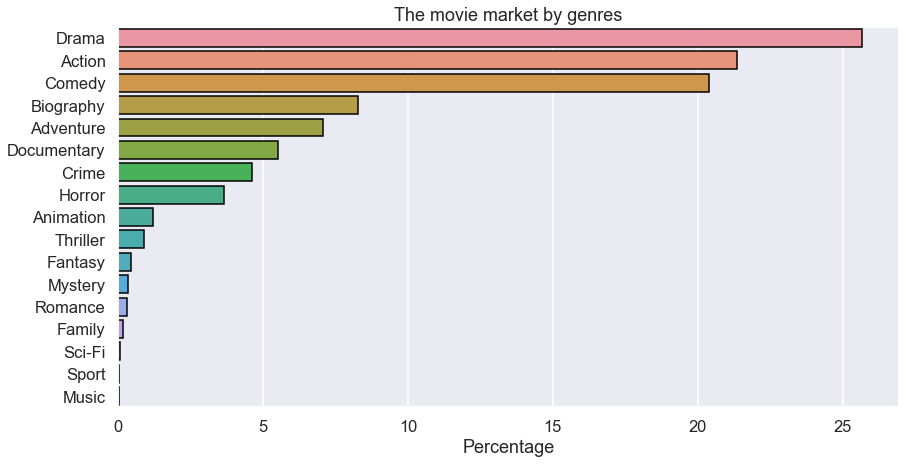

In [913]:
# graphical representation
studio_genre1 = StudioM_df['genre1']

fig, ax = plt.subplots(figsize=(14,7))

#Plotting
sns.barplot(x=top_genre1_percent, y=top_genre1_percent.index, orient="h", edgecolor = "black")

#Labels
plt.title('The movie market by genres')
plt.xlabel('Percentage')

#Rotation
plt.xticks(rotation=0);

It is clear that the number of movie production is mostly dominated by Drama, action and comedy movie genres. 
These categories have already passed the score of 20% each.

##### 11. Evolution of the number of movies over the years

In [933]:
# Counting the number of movie produced by year
year_counts = StudioM_df["year"].value_counts()
year_counts.describe();
year_counts

2015    414
2016    405
2011    357
2012    355
2014    350
2017    318
2013    314
2018    276
2010    238
Name: year, dtype: int64

In [935]:
#Statistical summary of the number of movie produced by year
year_counts.describe()

count      9.000000
mean     336.333333
std       56.848483
min      238.000000
25%      314.000000
50%      350.000000
75%      357.000000
max      414.000000
Name: year, dtype: float64

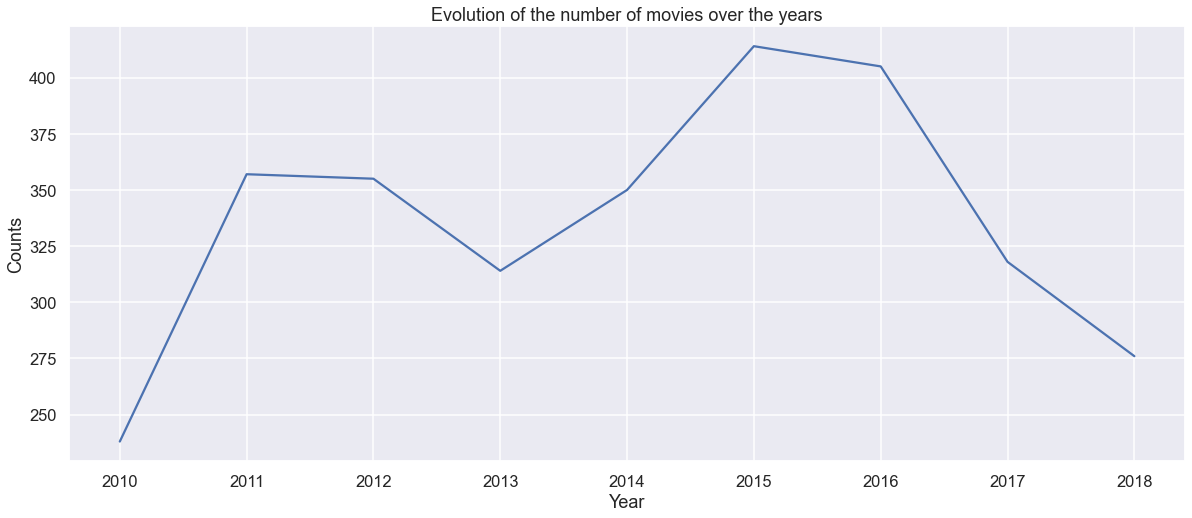

In [916]:
# graphical representation
fig, ax = plt.subplots(figsize=(20,8))

#Plotting
sns.lineplot(x = year_counts.index , y = year_counts)

#Labels
plt.xlabel("Year")
plt.ylabel("Counts")
plt.title("Evolution of the number of movies over the years")
plt.show();


This statistical distribution seems cyclical despite the breaking points observed in 2017 and exceptionally slid till 2018.

The year 2015 was a golden period that performed a record of the movies number. This success slightly occurred in 2016. Unfortunately, there has been a considerable drop-off of 32% of the produced movies from the year 2016 to 2018.

##### 12. The number of votes  received for the movie tite over the years

In [871]:
# Counting the number of votes produced by year
num_votes= StudioM_df.groupby('year')[['numvotes']].sum()

In [872]:
# Viewing the number of votes produced by year
num_votes

,numvotes
year,
2010,22112170
2011,24641926
2012,26166379
2013,25924976
2014,23718736
2015,20545521
2016,19152614
2017,14748350
2018,9756135


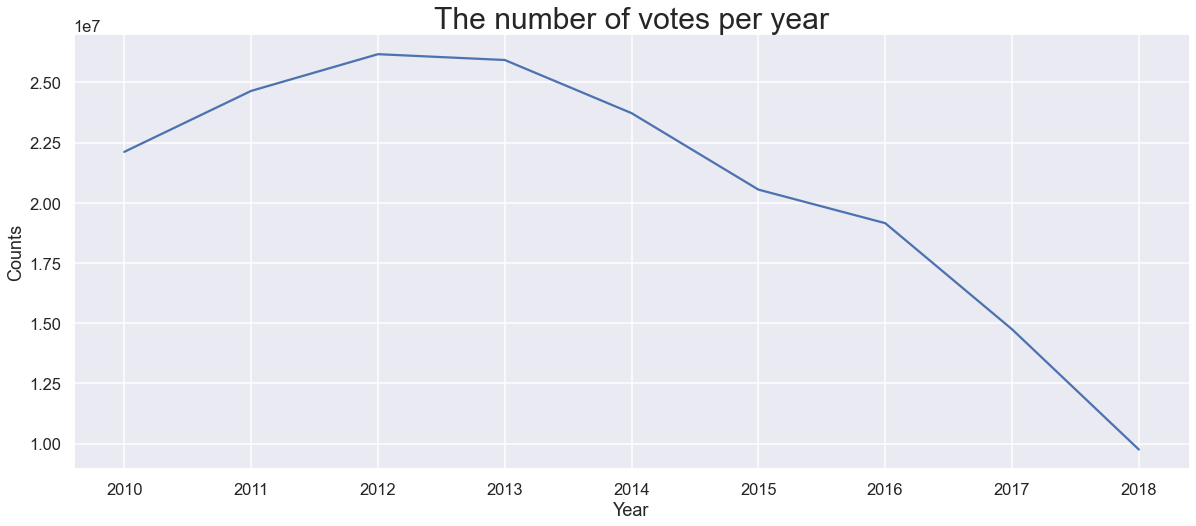

In [918]:
# graphical representation
fig, ax = plt.subplots(figsize=(20,8))

#Plotting
plt.plot(num_votes)

#Labels
plt.xlabel("Year")
plt.ylabel("Counts")
plt.title("The number of votes per year", fontsize=30)
plt.show();

The pattern found in this visualization defines the number of votes the movie title has received. In fact, the stated number started to positively increase from 2010 to 2012 (from 22112170 to 26166379 votes). Almost a slight stagnation was observed from 2012 to 2013.
Unfortunately, the trend drasticaly started to decline from 2013 up to 2018 (from 25,924,976 to 9,756,135 votes :an extreme drop-off of 62.4% of votes)

### IV.1. Conclusion and Recommandation


The aim of this exploratory business data analysis was to deliver actionable insights to the company directing board for efficient decision-making on the movie studio creation.

  o The foreign market is more profitable than the domestic one in any movie category throughout the years. Therefore, we recommend Microsoft to more stress the movie investment in the foreign market. This can help diversify its portfolios, hedge against risk and tap into growth in economies beyond your own.
 
  o It was important to segment revenue by movie genre in order to determine which movie categories (genre) should Microsoft start investing on. Therefore, the action movie category is an extreme profitable product. It has generated the highest gross income for the total for both domestic and foreign market. The following profitable movie genres are respectively Adventure, Drama and comedy. we highly recommend the company to focus their production on these four categories.
    
  o Top highest movie studios in the industry have been identified respectively in this order:
            1. Universal
            2. IFC Films
            3. Fox
            4. Warner Bros
            5. Magn
            6. SPC
            8. BV
            8. LGF
            9. Paramount
            10. Sony
            
We strongly recommend Microsoft to keep of track those competitors on a daily basis and potentially build relationship with them. Collaborating with competitors has higher probabilities to get access to data, analytics, trends, and new resources that will be mutually beneficial. Working together can help identify new sales opportunities, promote cross-selling, coordinate marketing promotions or/and promote the company in this movie industry.
                
The yearly number of movie seems cyclical, with an average of 336 movies produced, despite the breaking points observed in 2017 and exceptionally slid of 32% in 2018. The same year recorded an extreme drop-off 62.4% of the votes the movie titles has received. Besides, the worldwide (proportional to domestic and foreign) movie gross earnings declined extremely in the same years (from 2017 to 2018). 

Consequently, we recommend further the statistical analysis (casual, explanatory and/or prescriptive, etc.) in order to determine the causes and effects of this situation or determine optimal course of the investment by considering all relevant factors. Besides, incorporating qualitative information into regression analysis through dummy indicator variables will bring more apprehension. In fact, we would like to know:

                 o What cause the foreign box office earnings to be always higher than the domestic box office
                 o Determinant factors of an average rating on the maximal gross movie income
                 o Market/ gross income predictions (foreign and domestic)
                 o Etc. 